# Sentiment Analysis of E-Commerce Reviews using Machine Learning
# By Sahil Dhatrak

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import math
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.expand_frame_repr', False)
sb.set_style("whitegrid") 
%matplotlib inline 
np.random.seed(7)

### Loading the reviews file consisting 30,000 reviews extracted from Amazon

In [6]:
data_file = 'reviews_final.csv'
data = pd.read_csv(data_file)
data.head(10)

,reviews.rating,reviews.text
0,5,I have been a Macbook pro user for last 2 year...
1,1,Writing the review after a two yr usage of mac...
2,3,\n\n\n\n\n\n\n\n \n \n I wanted to purcha...
3,1,Very disappointed by the product quality. Afte...
4,2,"Apple Products are usually good, perform well ..."
5,5,I got this for 52K during Amazon Sale. I can s...
6,1,Don't buy for the pride or quality advertised....
7,2,bought in oct 2018 and it broke down in 7 jan ...
8,1,"Not satisfied, purchased on Mar 2018, it was w..."
9,1,\n\n\n\n\n\n\n\n \n \n charger not workin...


# Text Filtering

### Removing Breaklines

In [77]:
import re
review_1 = list(data['reviews.text'])
review_2 = []
review_no_breakline = []
for c in review_1:
    c = re.sub(r'\n', ' ', c)
    review_2.append(c)
for c in review_2:
    c = re.sub(r'\r', ' ', c)
    review_no_breakline.append(c)

review_1[2] #Review before removing breaklines

'\n\n\n\n\n\n\n\n  \n  \n    I wanted to purchase the product in no cost EMI as what was displayed, but due to amazon internal error I had to purchase it on one go, so bit unsatisfied with amazon. Rest the product was good.\n  \n'

In [78]:
review_no_breakline[2] #Review after removing breaklines

'                  I wanted to purchase the product in no cost EMI as what was displayed, but due to amazon internal error I had to purchase it on one go, so bit unsatisfied with amazon. Rest the product was good.    '

### Removing Hyperlinks

In [11]:
review_no_hyperlinks = []
for c in review_no_breakline:
    urls = re.findall('(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', c)
    if len(urls) == 0:
        pass
    else:
        for url in urls:
            for link in url:
                c = c.replace(link, '')
        c = c.replace(':', '')
        c = c.replace('/', '')
    review_no_hyperlinks.append(c)

In [12]:
review_no_hyperlinks[35]

"It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders"

### Removing Numbers

In [79]:
review_no_numbers = []
for c in review_no_hyperlinks:
    c = re.sub(r'\d+(?:\.\d*(?:[eE]\d+))?', '', c)
    review_no_numbers.append(c)
    
review_no_hyperlinks[38] #Review before removing numbers

'Pros:1. Light weight and super fast response time2. Highly optimize which avoids any kind of process lag.3. Beautiful looks and feels like a prime product.4. Long battery life and awesome sound clarity5. Purchased during Amazon sale cost around 52k.Cons:1. Not enough memory2. Limited softwares available3. Operating system is not that user-friendlyProbably one of the best option for 50k+ laptops'

In [80]:
review_no_numbers[38] #Review after removing numbers

'Pros:. Light weight and super fast response time. Highly optimize which avoids any kind of process lag.. Beautiful looks and feels like a prime product.. Long battery life and awesome sound clarity. Purchased during Amazon sale cost around k.Cons:. Not enough memory. Limited softwares available. Operating system is not that user-friendlyProbably one of the best option for k+ laptops'

### Removing Special Characters

In [81]:
review_no_spec_char = []
for c in review_no_numbers:
    c = re.sub(r'R\$', ' ', c)
    c = re.sub(r'\W', ' ', c)
    review_no_spec_char.append(c)

review_no_numbers[33] #Review before removing special characters

"Bought it on th July, stopped working / not turning power on by th Nov. Adding to this disappointment is - Apple's refusal to repair it under warranty stating that there is corrosion in Logic Board. Amazon also did not help. The seller - Appario - does not like to be bothered with it. Sometimes I wonder if buying electronics online is a good idea!"

In [82]:
review_no_spec_char[33] #Review after removing special characters

'Bought it on th July  stopped working   not turning power on by th Nov  Adding to this disappointment is   Apple s refusal to repair it under warranty stating that there is corrosion in Logic Board  Amazon also did not help  The seller   Appario   does not like to be bothered with it  Sometimes I wonder if buying electronics online is a good idea '

### Removing Additional Whitespaces

In [83]:
review_no_whitespaces = []
for c in review_no_spec_char:
    c = re.sub(r'\s+', ' ', c)
    review_no_whitespaces.append(c)

review_no_spec_char[59] #Review before removing additional whitespaces

'                  I am in love with my MacBook  Its smart  It never hangs  Its fast  Sound quality is commendable  The picture quality is just fabulous  Its worth money and time  I can run any programs in it  It has sofisticated software that can compile any language programs     '

In [85]:
review_no_whitespaces[59] #Review after removing additional whitespaces

' I am in love with my MacBook Its smart It never hangs Its fast Sound quality is commendable The picture quality is just fabulous Its worth money and time I can run any programs in it It has sofisticated software that can compile any language programs '

### Comparison of reviews before and after RegEx

In [86]:
processed_reviews = data.copy()
processed_reviews['reviews.text after regex'] = review_no_whitespaces
processed_reviews.head(15)

,reviews.rating,reviews.text,reviews.text after regex
0,5,I have been a Macbook pro user for last 2 year...,I have been a Macbook pro user for last years ...
1,1,Writing the review after a two yr usage of mac...,Writing the review after a two yr usage of mac...
2,3,\n\n\n\n\n\n\n\n \n \n I wanted to purcha...,I wanted to purchase the product in no cost E...
3,1,Very disappointed by the product quality. Afte...,Very disappointed by the product quality After...
4,2,"Apple Products are usually good, perform well ...",Apple Products are usually good perform well a...
5,5,I got this for 52K during Amazon Sale. I can s...,I got this for K during Amazon Sale I can say ...
6,1,Don't buy for the pride or quality advertised....,Don t buy for the pride or quality advertised ...
7,2,bought in oct 2018 and it broke down in 7 jan ...,bought in oct and it broke down in jan and tel...
8,1,"Not satisfied, purchased on Mar 2018, it was w...",Not satisfied purchased on Mar it was working ...
9,1,\n\n\n\n\n\n\n\n \n \n charger not workin...,charger not workingservice center not availab...


In [87]:
del processed_reviews['reviews.text']

### Removing Stopwords

In [88]:
review_with_stopwords = list(processed_reviews['reviews.text after regex'].values)
review_with_stopwords[12] #reviews containing stopwords

'Got the Apple Macbook air on amazon discount sale The OS is smooth and is a breeze to work with Ships with macOS sierra but update is available to macOS mojave The design and build quality as you can expect from an apple product is top notch Excellen sound quality keyboard Cons GB may be low incase you want to have movies and media in your laptop You need to carry around a hard disk that kind of nullifies the advantage of having a light weight laptop Display resolution is not exactly upto the mark'

In [89]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

stopwords_eng = stopwords.words('english')
stopwords_eng2 = stopwords_eng
stopwords_eng2 = [x.capitalize() for x in stopwords_eng2]
stopwords_final = stopwords_eng + stopwords_eng2
stopwords_final.remove('very')
stopwords_final.remove('Very')
stopwords_final.remove('not')
stopwords_final.remove('Not')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sahildhatrak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [90]:
stopwords_final #List of stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [91]:
review_without_stopwords = []
y=[]
for review in review_with_stopwords:
    y=''
    for word in review.split():
        if word not in stopwords_final:
            y+= word + ' '
    review_without_stopwords.append(y)

review_without_stopwords[12] #review without stopwords

'Got Apple Macbook air amazon discount sale OS smooth breeze work Ships macOS sierra update available macOS mojave design build quality expect apple product top notch Excellen sound quality keyboard Cons GB may low incase want movies media laptop need carry around hard disk kind nullifies advantage light weight laptop Display resolution not exactly upto mark '

In [92]:
processed_reviews.head(10)

,reviews.rating,reviews.text after regex
0,5,I have been a Macbook pro user for last years ...
1,1,Writing the review after a two yr usage of mac...
2,3,I wanted to purchase the product in no cost E...
3,1,Very disappointed by the product quality After...
4,2,Apple Products are usually good perform well a...
5,5,I got this for K during Amazon Sale I can say ...
6,1,Don t buy for the pride or quality advertised ...
7,2,bought in oct and it broke down in jan and tel...
8,1,Not satisfied purchased on Mar it was working ...
9,1,charger not workingservice center not availab...


In [93]:
processed_reviews['reviews.text after removing stopwords'] = review_without_stopwords
processed_reviews.head(15)


,reviews.rating,reviews.text after regex,reviews.text after removing stopwords
0,5,I have been a Macbook pro user for last years ...,Macbook pro user last years came across new Ma...
1,1,Writing the review after a two yr usage of mac...,Writing review two yr usage macbook Bought ver...
2,3,I wanted to purchase the product in no cost E...,wanted purchase product cost EMI displayed due...
3,1,Very disappointed by the product quality After...,Very disappointed product quality carefully us...
4,2,Apple Products are usually good perform well a...,Apple Products usually good perform well nonco...
5,5,I got this for K during Amazon Sale I can say ...,got K Amazon Sale say best budget friendly Mac...
6,1,Don t buy for the pride or quality advertised ...,buy pride quality advertised lapot keyboard fa...
7,2,bought in oct and it broke down in jan and tel...,bought oct broke jan tell afte spending much m...
8,1,Not satisfied purchased on Mar it was working ...,Not satisfied purchased Mar working well getti...
9,1,charger not workingservice center not availab...,charger not workingservice center not availabl...


### Lemmatization

In [94]:
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import WhitespaceTokenizer

lemmatizer = WordNetLemmatizer()
w_tokenizer = WhitespaceTokenizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w, pos="v") for w in w_tokenizer.tokenize(text)]

after_lemma = processed_reviews['reviews.text after removing stopwords'].apply(lemmatize_text)
after_lemma = after_lemma.str.join(' ')
processed_reviews['reviews.text after lemmatization'] = after_lemma
processed_reviews[['reviews.text after removing stopwords', 'reviews.text after lemmatization']].head(15)

,reviews.text after removing stopwords,reviews.text after lemmatization
0,Macbook pro user last years came across new Ma...,Macbook pro user last years come across new Ma...
1,Writing review two yr usage macbook Bought ver...,Writing review two yr usage macbook Bought ver...
2,wanted purchase product cost EMI displayed due...,want purchase product cost EMI display due ama...
3,Very disappointed product quality carefully us...,Very disappoint product quality carefully use ...
4,Apple Products usually good perform well nonco...,Apple Products usually good perform well nonco...
5,got K Amazon Sale say best budget friendly Mac...,get K Amazon Sale say best budget friendly Mac...
6,buy pride quality advertised lapot keyboard fa...,buy pride quality advertise lapot keyboard fai...
7,bought oct broke jan tell afte spending much m...,buy oct break jan tell afte spend much money w...
8,Not satisfied purchased Mar working well getti...,Not satisfy purchase Mar work well get suddenl...
9,charger not workingservice center not availabl...,charger not workingservice center not availabl...


# Feature Extraction using TF-IDF

In [95]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [96]:
X = list(processed_reviews['reviews.text after lemmatization'])
y = processed_reviews['reviews.rating']
y = y.astype(int)
count_vectorizer = CountVectorizer(max_features=300).fit(X)
vectorizer = TfidfVectorizer(max_features=300)
processed_features = vectorizer.fit_transform(X).toarray()

# Review processed
processed_features[0] #Review in the form of a vector

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.25292215, 0.0734704 , 0.        , 0.        ,
       0.        , 0.        , 0.06444468, 0.06225626, 0.0739517 ,
       0.        , 0.        , 0.08638741, 0.        , 0.1716529 ,
       0.05581772, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.04473784, 0.11697071, 0.04989792, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.07985313, 0.        , 0.07848606,
       0.        , 0.        , 0.        , 0.1325524 , 0.32242632,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.06218546, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.07345284, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [97]:
i = 0
for k, v in count_vectorizer.vocabulary_.items():
    tfidf = vectorizer.idf_[count_vectorizer.vocabulary_[k]]
    print(f'Word: {k:<12} - Count: {v:<10} - TF-IDF: {tfidf}')
    i += 1
    if i == 10:
        break

#Words with their Count value and TF-IDF value

Word: macbook      - Count: 141        - TF-IDF: 4.633890517692713
Word: user         - Count: 276        - TF-IDF: 4.15253108468713
Word: last         - Count: 129        - TF-IDF: 3.905091128513783
Word: years        - Count: 298        - TF-IDF: 4.184753911798944
Word: come         - Count: 48         - TF-IDF: 4.039312890513326
Word: new          - Count: 159        - TF-IDF: 3.7634406114507555
Word: get          - Count: 101        - TF-IDF: 2.7022058718752455
Word: review       - Count: 215        - TF-IDF: 4.058839312863681
Word: first        - Count: 95         - TF-IDF: 4.001367958949203
Word: compare      - Count: 49         - TF-IDF: 3.930161227802231


# Building a Pre-Processing Pipeline

In [98]:
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.sparse import csr_matrix
from sklearn.pipeline import Pipeline

In [99]:
class ApplyRegex(BaseEstimator, TransformerMixin):
    
    def __init__(self, break_line=True, carriage_return=True, numbers=True, number_replacing='', 
                 special_char=True, additional_spaces=True):
        self.break_line = break_line
        self.carriage_return = carriage_return
        self.numbers = numbers
        self.number_replacing = number_replacing
        self.special_char = special_char
        self.additional_spaces = additional_spaces
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_transformed = []
        for c in X:
            if self.break_line:
                c = re.sub('\n', ' ', c)
            if self.carriage_return:
                c = re.sub('\r', ' ', c)
            if self.numbers:
                c = re.sub(r'\d+(?:\.\d*(?:[eE]\d+))?', self.number_replacing , c)
            if self.special_char:
                c = re.sub(r'R\$', ' ', c)
                c = re.sub(r'\W', ' ', c)
            if self.additional_spaces:
                c = re.sub(r'\s+', ' ', c)
            X_transformed.append(c)
        return X_transformed
    

In [100]:
class StopWordsRemoval(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def stopword_removal(self):
        y=[]
        review_no_stopword = []
        for idx, review in enumerate(self) :
            try:
                y=''
                for word in review.split():
                    if word not in stopwords_final:
                        y+= word + ' '
                review_no_stopword.append(y)
            except:
                print(idx)
        return review_no_stopword
        
    def transform(self, X, y=None): 
        X_transformed = StopWordsRemoval.stopword_removal(X)
        return X_transformed


In [101]:
class TextLemmatization(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    
    def lemmatize_text(text):
        return ' '.join(lemmatizer.lemmatize(w, pos="v") for w in w_tokenizer.tokenize(text))


    def transform(self, X, y=None):
        X_transformed = list(map(lambda c: TextLemmatization.lemmatize_text(c), X))
        return X_transformed


In [102]:
preprocess_pipeline = Pipeline([
    ('regex_cleaner', ApplyRegex()),
    ('stopwords_remover', StopWordsRemoval()),
    ('lemmatization', TextLemmatization()),
])

# Applying a Pipeline

In [119]:
X = data['reviews.text']
y = data['reviews.rating'].values
y = y.astype(int)

X_preprocessed = preprocess_pipeline.fit_transform(X)
reviews_vector = list(map(lambda c: nltk.word_tokenize(c), X_preprocessed))
vectorizer = CountVectorizer(max_features=300)
X_transformed = vectorizer.fit_transform(X_preprocessed).toarray()

X_transformed[0] #Review in the form of a vector

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       2, 0, 3, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 2, 5, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 5, 1, 1, 0,
       4, 0, 0, 0, 0, 0, 1, 0, 3, 5, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 3, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

# Data Exploaration

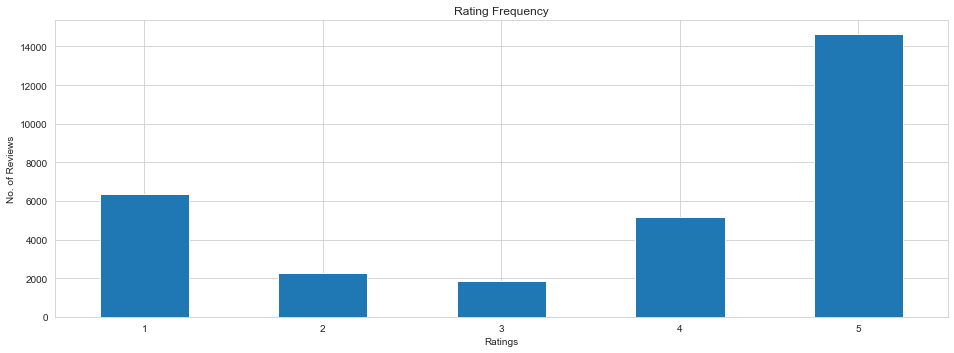

In [104]:
count = processed_reviews["reviews.rating"].value_counts().index
plt.subplots(1,1,figsize=(16,12))
plt.subplot(2,1,1)
processed_reviews["reviews.rating"].value_counts().sort_index().plot(kind="bar", title="Rating Frequency")
plt.xticks(rotation=0)
plt.xlabel('Ratings')
plt.ylabel('No. of Reviews')
plt.show()

# Labelling and Splitting of Data

In [105]:
bin_edges = [0, 2, 3, 5]
bin_names = ['Negative', 'Neutral', 'Positive']
processed_reviews['class'] = pd.cut(processed_reviews['reviews.rating'], bins=bin_edges, labels=bin_names)

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transformed, processed_reviews['class'] , test_size=.20, random_state=42)

# Training and Evaluating the Model

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix
from scipy.sparse import csr_matrix

In [108]:
log_reg = LogisticRegression(max_iter = 200, multi_class = 'auto', solver = 'newton-cg', verbose=1)
log_reg.fit(X_train, y_train)
predictions = log_reg.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s finished


In [109]:
# Evaluating results

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       0.86      0.82      0.84      1741
     Neutral       0.29      0.06      0.10       335
    Positive       0.88      0.96      0.92      3974

    accuracy                           0.87      6050
   macro avg       0.68      0.61      0.62      6050
weighted avg       0.84      0.87      0.85      6050



# Class Prediction

In [110]:
example = ['Bought in 2017. It is a bad product. The battery life sucks.' ]
example_preprocessed = preprocess_pipeline.fit_transform(example)

# Vectorizing
example_transformed = vectorizer.transform(example_preprocessed).toarray()

# Communicating
example_pred = log_reg.predict(example_transformed)

In [111]:
example_pred #Example belongs to which class

array(['Negative'], dtype=object)

# Confusion Matrix

In [112]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[1424,   27,  290],
       [  98,   20,  217],
       [ 139,   23, 3812]])

Text(0.5, 257.44, 'Predicted label')

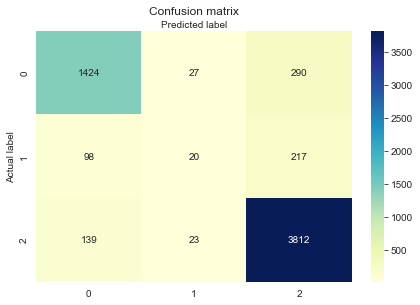

In [113]:
class_names=['Negative', 'Neutral', 'Positive'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Sentiment Score Predictor

In [114]:
import colored
def SentimentScorePredictor(text):
    text_preprocessed = preprocess_pipeline.fit_transform(text)
    text_transformed = vectorizer.transform(text_preprocessed).toarray()
    review_proba = log_reg.predict_proba(text_transformed)
    sentiment_score = round(review_proba[0,2]*100,2)
    sentiment_score = sentiment_score.item()
    if(sentiment_score <= 30):
        sentiment_score = str(sentiment_score)
        print(colored.fg("red") + sentiment_score)
    elif(30 < sentiment_score < 70):
        sentiment_score = str(sentiment_score)
        print(colored.fg("yellow") + sentiment_score)
    elif(70 <= sentiment_score <= 100):
        sentiment_score = str(sentiment_score)
        print(colored.fg("green") + sentiment_score)

### "Bought in 2017. It is a good product and I loved it."

In [115]:
SentimentScorePredictor(['Bought in 2017. It is a good product and I loved it.'])

97.8


### "Bought in 2017. It is a good product."

In [116]:
SentimentScorePredictor(['Bought in 2017. It is a good product.'])

84.95


### "Bought in 2017. It is an okay product."

In [117]:
SentimentScorePredictor(['Bought in 2017. It is an okay product.'])

60.17


### "Bought in 2017. It is a bad product. The battery life sucks."

In [118]:
SentimentScorePredictor(['Bought in 2017. It is a bad product.'])

26.14
